In [3]:
import numpy as np
import pandas as pd
from numpy.fft import fft
from matplotlib import pyplot as plt
import math
import warnings,os
import glob
from scipy.signal import find_peaks
warnings.filterwarnings('ignore')

In [4]:
path="./data/feb_18_data/test_25_each_label/material_classification/"
folder_list = os.listdir(path)

In [103]:
folder_list

['alu_hollow_thin',
 'alu',
 'bra',
 'woo',
 'pla',
 'printed_pla',
 'alu_hollow_thick',
 'printed_resin',
 'bra_hollow_thin']

Import dataset

In [104]:
file_size=25
def get_data(raw_data):
  data=raw_data.drop(["msg"],axis=1)
  rot_data = data
  return rot_data
# concate all data to single file
for name_idx in range(len(folder_list)):
  df=[]
  for i in range(1,file_size+1):
    material=path+folder_list[name_idx]
    filename="/output_"+str(i)+".csv"
    temp=pd.read_csv(material+filename)
    temp=get_data(temp) # remove the unuse columns
    row_data=[]
    for row in range (len(temp)):
      row_data.append(temp.iloc[row].values)
    row_data=np.array(row_data).reshape((1,-1)).squeeze(axis=0)
    df.append(row_data)
  df=pd.DataFrame(df)
  material=path+folder_list[name_idx]
  df.transpose().to_csv(material+"/all_result.csv")
  print("finish"+folder_list[name_idx])

finishalu_hollow_thin
finishalu
finishbra
finishwoo
finishpla
finishprinted_pla
finishalu_hollow_thick
finishprinted_resin
finishbra_hollow_thin


In [6]:
import random
def print_original_plot(name,path,outlier_delete=False):
  material=path+name
  filename="/all_result.csv"
  df=pd.read_csv(material+filename)
  df=df.dropna(axis=0) # drop the unconsistent data long
  df=df.drop(list(df)[0],axis=1)
  # print(df.describe())
  if outlier_delete:
    randomlist = random.sample(range(0, len(df)), 1000)
    for i in randomlist:
      mean = df.iloc[i].mean()
      std = df.iloc[i].std()

      z_scores = (df.iloc[i] - mean) / std

      mask = np.abs(z_scores) > 5
      # print(mask)
      drop_col=[]
      for i in range(len(mask)):
        if mask[i]:
          drop_col.append(df.columns[i])
      df.drop(drop_col,axis=1, inplace=True)
  
  # print(df.shape)
  # # print(df)
  # df.plot(kind='line',alpha=0.5, figsize=(10, 4),title=name+' orignal data plot',legend=False)
  # df.plot(kind='hist',alpha=0.5, figsize=(10, 10),title=name+" orignal data plot",legend=False)
  return df

In [104]:
path="./data/feb_18_data/training_100_each_label/material_classification/"
folder_list = os.listdir(path)
df_all=pd.DataFrame()
# labellist=['alu_hollow_thick','alu_hollow_thin','alu','brass_hollow','brass','printpla','pla','printresin','wood']
# labellist=['brass_hollow','brass','printpla','pla','printresin','wood']
# labellist=['alu','brass','printpla','pla','printresin','wood']
labellist=folder_list
# labellist=['center','edge','middle']
# labellist=['full','stand','point']
# labellist=['1','2']
labellist.sort()
labellist.reverse()
for name in folder_list:
  df_temp=print_original_plot(name=name,path=path)
  label=""
  for i in labellist:
    if i == name :
      label=i
      break
  if (label=='' ): continue
  print(label,name)
  df_temp.loc['label']=[labellist.index(label) for _ in list(df_temp)]
  df_all = pd.concat([df_all, df_temp], axis=1)


woo woo
printed_resin printed_resin
printed_pla printed_pla
pla pla
bra_hollow_thin bra_hollow_thin
bra bra
alu_hollow_thin alu_hollow_thin
alu_hollow_thick alu_hollow_thick
alu alu


In [105]:
df_all2=pd.DataFrame()
path_2="./data/feb_18_data/test_25_each_label/grasping_point/"
folder_list_2 = os.listdir(path_2)
for name in folder_list_2:
  # if ('2' in name ): continue
  df_temp=print_original_plot(name=name,path=path_2)
  label=""
  for i in labellist:
    if i in name :
      label=i
      break
  if (label==''or 'center' in name ): continue
  print(label,name)
  df_temp.loc['label']=[labellist.index(label) for _ in list(df_temp)]
  df_all2 = pd.concat([df_all2, df_temp], axis=1,ignore_index=True)

pla pla_edge
printed_pla printed_pla_edge
woo woo_edge
printed_resin printed_resin_middle
alu alu_middle
bra_hollow_thin bra_hollow_thin_middle
alu_hollow_thick alu_hollow_thick_middle
woo woo_middle
printed_resin printed_resin_edge
bra bra_middle
alu_hollow_thin alu_hollow_thin_middle
alu alu_edge
bra_hollow_thin bra_hollow_thin_edge
bra bra_edge
alu_hollow_thick alu_hollow_thick_edge
alu_hollow_thin alu_hollow_thin_edge
pla pla_middle
printed_pla printed_pla_middle


In [106]:
df_all=df_all.dropna(axis=0)
df_all2=df_all2.dropna(axis=0)


In [91]:
df_all

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.0,0.0,8.0,1.0,4.0,1.0,-5.0,-6.0,5.0,6.0,...,8.0,-6.0,-4.0,-6.0,6.0,2.0,-4.0,-1.0,6.0,7.0
1,1.0,1.0,9.0,2.0,4.0,-3.0,-4.0,-4.0,2.0,8.0,...,6.0,-2.0,-5.0,-6.0,8.0,6.0,-4.0,1.0,0.0,-1.0
2,3.0,6.0,7.0,4.0,-3.0,-6.0,-1.0,-3.0,2.0,2.0,...,10.0,-4.0,-2.0,-2.0,5.0,2.0,-7.0,0.0,5.0,3.0
3,-8.0,8.0,4.0,2.0,-1.0,0.0,-3.0,-12.0,1.0,-2.0,...,10.0,-7.0,-3.0,1.0,7.0,0.0,1.0,-1.0,3.0,7.0
4,-2.0,1.0,5.0,6.0,5.0,-7.0,-4.0,-3.0,1.0,7.0,...,6.0,2.0,0.0,-7.0,6.0,1.0,0.0,2.0,-1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44028,7.0,9.0,0.0,-10.0,-13.0,-13.0,-8.0,-19.0,-15.0,20.0,...,-26.0,-25.0,-20.0,-22.0,-16.0,-12.0,-10.0,15.0,6.0,10.0
44029,-12.0,-8.0,-12.0,-14.0,10.0,12.0,17.0,9.0,17.0,14.0,...,20.0,29.0,34.0,27.0,26.0,16.0,13.0,-2.0,13.0,6.0
44030,15.0,21.0,8.0,5.0,-20.0,-22.0,8.0,-7.0,-6.0,2.0,...,-20.0,-25.0,-21.0,-27.0,-31.0,-24.0,-23.0,4.0,-10.0,-8.0
44031,-16.0,-15.0,-17.0,-22.0,11.0,21.0,3.0,-6.0,4.0,22.0,...,9.0,14.0,25.0,25.0,25.0,23.0,25.0,1.0,22.0,18.0


In [92]:
df_all2

,0,1,2,3,4,5,6,7,8,9,...,665,666,667,668,669,670,671,672,673,674
0,-4.0,4.0,2.0,0.0,7.0,-4.0,5.0,3.0,-3.0,-4.0,...,8.0,0.0,0.0,2.0,4.0,8.0,3.0,-9.0,6.0,1.0
1,2.0,0.0,2.0,-1.0,6.0,-2.0,5.0,4.0,4.0,-5.0,...,4.0,0.0,-5.0,2.0,-6.0,8.0,-4.0,0.0,6.0,-1.0
2,-1.0,4.0,2.0,-2.0,5.0,-4.0,3.0,4.0,-1.0,0.0,...,4.0,1.0,-4.0,2.0,1.0,9.0,0.0,-6.0,5.0,0.0
3,-3.0,3.0,4.0,-5.0,8.0,2.0,12.0,4.0,-3.0,-3.0,...,5.0,-8.0,-1.0,1.0,-3.0,6.0,-4.0,-4.0,9.0,-2.0
4,-2.0,-2.0,1.0,1.0,10.0,-2.0,1.0,5.0,-5.0,-1.0,...,6.0,-10.0,-8.0,0.0,-7.0,10.0,3.0,-6.0,7.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44028,-6.0,-9.0,-12.0,13.0,-3.0,5.0,-2.0,-5.0,-22.0,27.0,...,-1.0,-8.0,0.0,-7.0,-5.0,-3.0,-1.0,-8.0,-3.0,-7.0
44029,26.0,20.0,14.0,-15.0,7.0,0.0,-8.0,7.0,9.0,-8.0,...,0.0,-3.0,1.0,-7.0,-10.0,-3.0,-8.0,-3.0,-1.0,0.0
44030,-18.0,-21.0,-19.0,29.0,-17.0,-13.0,-17.0,16.0,-5.0,11.0,...,6.0,-2.0,2.0,-4.0,-9.0,-3.0,1.0,-5.0,-3.0,-8.0
44031,31.0,27.0,28.0,-24.0,18.0,15.0,3.0,-9.0,-13.0,6.0,...,4.0,0.0,3.0,-3.0,-8.0,-5.0,-4.0,-4.0,3.0,8.0


In [107]:
def fft_self(df):
    data_rows = df.iloc[:-1, :]  # All rows except the last
    label_row = df.iloc[-1, :]    # Last row (label)

    # Apply FFT on each column except the last row
    fft_result = data_rows.apply(lambda col: np.abs(np.fft.fft(col)), axis=0)

    # Append the label row to the FFT result
    fft_result.loc['label'] = label_row
    return fft_result

In [108]:
df_all = pd.concat([df_all.iloc[:42000], df_all.iloc[[-1]]], axis=0,ignore_index = True)
df_all2 = pd.concat([df_all2.iloc[:42000], df_all2.iloc[[-1]]], axis=0,ignore_index = True)
df_all=fft_self(df_all)
df_all2=fft_self(df_all2)

In [21]:
def positive_find_peak(df):
    df.columns=[i for i in range(df.shape[1])]
    data_rows = df.iloc[:-1, :]  # All rows except the last
    label_row = df.iloc[-1, :]    # Last row (label)
    def pfp(singleCol):
        data_positive=np.abs(singleCol)
        peaks_idx,_=find_peaks(data_positive)
        return data_positive[peaks_idx]
    new=pd.DataFrame()
    for column in data_rows:
        data=np.array(data_rows[column])
        df_temp=pd.DataFrame(pfp(data))
        new = pd.concat([new, df_temp], axis=1,ignore_index=True)
    
    new.loc['label']=label_row
    # print(new)
    return new

In [22]:
df_=positive_find_peak(df_all.copy())
df_drop=df_.dropna(axis=0)
df_all=pd.concat([df_drop.iloc[:11000], df_drop.iloc[[-1]]], axis=0)

df_=positive_find_peak(df_all2.copy())
df_drop=df_.dropna(axis=0)
df_all2=pd.concat([df_drop.iloc[:11000], df_drop.iloc[[-1]]], axis=0)

In [55]:
df_all

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,17079.000000,19147.000000,21528.000000,19575.000000,21523.000000,15214.000000,18654.000000,22420.000000,22428.000000,20529.000000,...,13082.000000,22801.000000,20775.000000,22066.000000,20470.000000,15634.000000,20618.000000,19889.000000,19155.000000,20462.000000
1,3716.963613,1244.425208,1758.854822,1884.544126,715.431102,3038.641143,4132.168308,2042.850897,4101.290247,3666.552858,...,3438.792102,575.804116,614.622667,1387.379293,765.539106,5082.186589,2324.161649,1672.689296,2655.469570,1773.525282
2,4895.164338,5261.470673,2553.763559,3085.992465,1241.092807,2445.796202,2551.595078,4640.100100,4808.477734,3183.018789,...,1323.280273,2605.305241,1417.439660,1826.460287,1067.023077,3301.626388,3578.829382,1364.271252,1122.712124,711.401913
3,5218.512552,4895.199994,1101.138254,3287.769485,4941.971067,4880.633785,1122.394093,484.396458,4200.125276,569.534793,...,2199.332586,3709.837034,1898.668250,2061.412374,803.021639,1664.000458,2784.335932,1850.891834,1998.881459,188.055383
4,3867.653987,1725.609829,1982.349871,3070.060070,3575.939660,6573.442534,2915.601787,1385.147526,4448.240751,3234.426642,...,3488.286963,1956.858569,744.588438,2071.752090,2293.247884,1952.901433,1935.144681,3843.129738,2275.146147,1476.023589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41996,3867.653987,1725.609829,1982.349871,3070.060070,3575.939660,6573.442534,2915.601787,1385.147526,4448.240751,3234.426642,...,3488.286963,1956.858569,744.588438,2071.752090,2293.247884,1952.901433,1935.144681,3843.129738,2275.146147,1476.023589
41997,5218.512552,4895.199994,1101.138254,3287.769485,4941.971067,4880.633785,1122.394093,484.396458,4200.125276,569.534793,...,2199.332586,3709.837034,1898.668250,2061.412374,803.021639,1664.000458,2784.335932,1850.891834,1998.881459,188.055383
41998,4895.164338,5261.470673,2553.763559,3085.992465,1241.092807,2445.796202,2551.595078,4640.100100,4808.477734,3183.018789,...,1323.280273,2605.305241,1417.439660,1826.460287,1067.023077,3301.626388,3578.829382,1364.271252,1122.712124,711.401913
41999,3716.963613,1244.425208,1758.854822,1884.544126,715.431102,3038.641143,4132.168308,2042.850897,4101.290247,3666.552858,...,3438.792102,575.804116,614.622667,1387.379293,765.539106,5082.186589,2324.161649,1672.689296,2655.469570,1773.525282


In [56]:
df_all2

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,18969.000000,21405.000000,22294.000000,21461.000000,20457.000000,16622.000000,21060.000000,20972.000000,19813.000000,19753.000000,...,17169.000000,19750.000000,19077.000000,23800.000000,19980.000000,15726.000000,20488.000000,21226.000000,19658.000000,22372.000000
1,2369.766110,3193.353259,465.310442,744.230533,894.259199,2155.442269,1663.479410,1653.406319,893.610238,1491.912212,...,2174.807040,1036.331167,997.272288,1261.203071,2568.597958,2181.078872,543.061488,1469.310130,1857.244531,2560.397085
2,1534.313621,3931.028766,2891.403434,2200.565101,1490.829386,2126.975419,1646.364642,2605.674224,3334.219677,1820.545864,...,3361.149980,2060.978278,54.869856,2493.364268,2348.090834,2525.744289,825.838932,2857.131614,2293.983080,3496.091783
3,1441.042131,2669.239491,2965.588556,4118.322645,1329.466511,1895.747081,3105.132382,3516.755963,1163.525451,1154.681449,...,3487.300633,2631.055970,2151.642753,1438.769204,2018.780352,2028.974202,1445.968466,3393.339795,1939.432737,1398.410672
4,7550.187921,2929.543472,2822.098013,939.415521,3065.566953,6029.579236,2161.939105,1741.559394,1590.439411,2079.096263,...,811.425700,1686.627611,481.724171,2645.483336,2290.543746,2862.386790,982.354402,4038.391358,1988.129021,877.472847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41996,7550.187921,2929.543472,2822.098013,939.415521,3065.566953,6029.579236,2161.939105,1741.559394,1590.439411,2079.096263,...,811.425700,1686.627611,481.724171,2645.483336,2290.543746,2862.386790,982.354402,4038.391358,1988.129021,877.472847
41997,1441.042131,2669.239491,2965.588556,4118.322645,1329.466511,1895.747081,3105.132382,3516.755963,1163.525451,1154.681449,...,3487.300633,2631.055970,2151.642753,1438.769204,2018.780352,2028.974202,1445.968466,3393.339795,1939.432737,1398.410672
41998,1534.313621,3931.028766,2891.403434,2200.565101,1490.829386,2126.975419,1646.364642,2605.674224,3334.219677,1820.545864,...,3361.149980,2060.978278,54.869856,2493.364268,2348.090834,2525.744289,825.838932,2857.131614,2293.983080,3496.091783
41999,2369.766110,3193.353259,465.310442,744.230533,894.259199,2155.442269,1663.479410,1653.406319,893.610238,1491.912212,...,2174.807040,1036.331167,997.272288,1261.203071,2568.597958,2181.078872,543.061488,1469.310130,1857.244531,2560.397085


In [90]:
row_select=[]
idx=1000
gap=1
while(idx<(len(df_all)-1)):
  row_select.append(idx)
  idx+=gap
row_select.append(len(df_all)-1)

In [91]:
# df_all=df_all.iloc[row_select]
# df_all2=df_all2.iloc[row_select]

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import KernelPCA
from sklearn.neural_network import MLPClassifier

In [109]:
df = df_all.T
X=df.drop("label",axis=1)
y=df["label"].astype(int)
df2 = df_all2.T
X2=df2.drop("label",axis=1)
y2=df2["label"].astype(int)
X.shape,y.shape,X2.shape,y2.shape

((900, 42000), (900,), (450, 42000), (450,))

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=32)
# checkgroup=random.randint(1,19)
# test_idx=[5*(checkgroup-g)+i+j*100 for i in range(5) for j in range(0,9) for g in range(2)]
# train_idx=[]
# for i in range(900):
#     if i not in test_idx:
#         train_idx.append(i)
# X_train=X.iloc[train_idx]
# y_train=y[train_idx]
# X_test=X.iloc[test_idx]
# y_test=y[test_idx]
# X_train, X_test, y_train, y_test = X,X2,y,y2
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train=scaler.transform(X_train)
# X_test=scaler.transform(X_test)
kernel_pca = KernelPCA(kernel='cosine')
kpca=kernel_pca.fit(X_train)
X_train=kpca.transform(X_train)
X_test = kpca.transform(X_test)

# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)
# clf = svm.SVC()
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
clf = MLPClassifier((400,250,100),random_state=1, max_iter=300).fit(X_train, y_train)
y_pred=clf.predict(X_test)
# 

In [111]:
y_train.shape

(810,)

In [112]:
X_train.shape

(810, 809)

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
def plot_single(x,y,gap=100):
    data = pd.DataFrame(x).copy()  # All rows except the last one (data points)
    labels = y.copy()  # Last row (labels for each column)

    # Define colors for each of the 9 labels
    label_colors = {
        0: 'red', 1: 'blue', 2: 'green', 3: 'purple',
        4: 'orange', 5: 'brown', 6: 'pink', 7: 'cyan', 8: 'grey'
    }

    fig, ax = plt.subplots(figsize=(10, 4))
    for i in range(len(data)):
        if(i%gap!=0):continue
        label = labels.iloc[i]  # Get the label for the current row
        color = label_colors[label]  # Get the corresponding color
        data.iloc[i].plot(kind='line', ax=ax, color=color, alpha=0.8, label=labellist[label])  # Avoid repeating legend entries
    # Customize plot
    ax.set_ylim(0, 6000)
    plt.title('Raw data after self method')
    plt.legend(title="Labels", loc="upper right")
    plt.show()

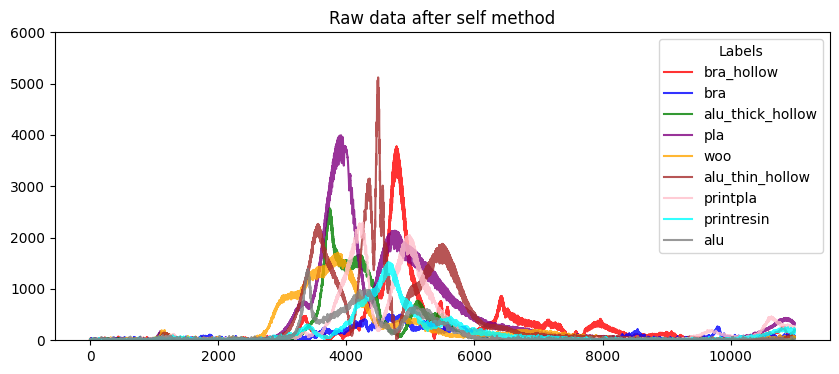

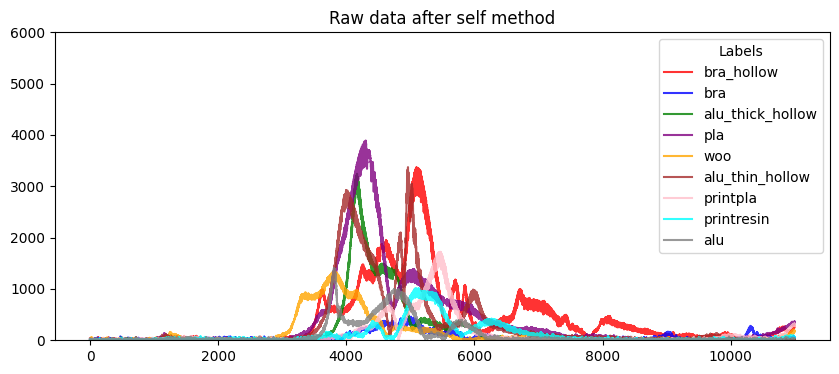

In [34]:
plot_single(X_train,y_train,100)
plot_single(X_test,y_test,10)

In [113]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [114]:
X_test, y_test = X2,y2
X_test = kpca.transform(X_test)
y_pred=clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 39.11%


In [115]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=labellist))
temp=classification_report(y_test, y_pred, target_names=labellist, output_dict=True)
output=pd.DataFrame(temp)

Classification Report:
                  precision    recall  f1-score   support

             woo       0.09      0.10      0.10        50
   printed_resin       0.32      0.50      0.39        50
     printed_pla       1.00      0.50      0.67        50
             pla       0.26      0.50      0.34        50
 bra_hollow_thin       1.00      0.92      0.96        50
             bra       0.34      1.00      0.51        50
 alu_hollow_thin       0.00      0.00      0.00        50
alu_hollow_thick       0.00      0.00      0.00        50
             alu       0.00      0.00      0.00        50

        accuracy                           0.39       450
       macro avg       0.33      0.39      0.33       450
    weighted avg       0.33      0.39      0.33       450



In [65]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

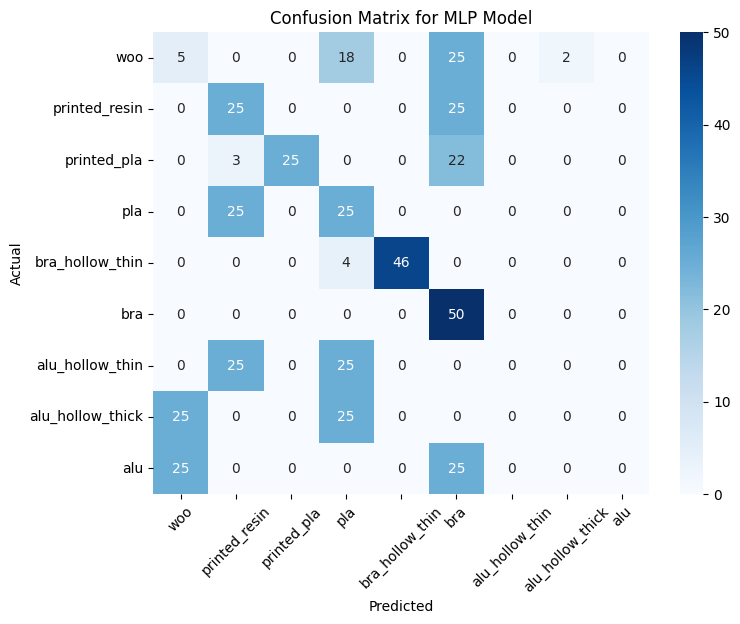

In [116]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labellist, yticklabels=labellist)
plt.xlabel('Predicted',)
plt.xticks(rotation=45)
plt.ylabel('Actual')
plt.title('Confusion Matrix for MLP Model')
plt.show()

In [165]:
output.T.to_csv('contact_withoutPoint_train_11_04_test_11_04_after_fft.csv')

In [72]:
import pickle 
pickle.dump(knn, open("Knn_train_11_01", 'wb'))

In [73]:
my_model_clf = pickle.load(open("Knn_train_11_01", 'rb')) 
result_score = my_model_clf.score(X_test,y_test) 
print("Score: ",result_score)

Score:  0.8777777777777778


In [232]:
X.shape

(900, 11000)

In [233]:
X_test.shape

(900, 11000)

In [234]:
X_train.shape

(900, 11000)